In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurar pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✅ Libraries imported successfully")
print(f"📅 Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")


Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully
📅 Analysis date: 2026-01-03 04:16


In [2]:
# Cargar dataset
print("Loading Steam Games Dataset...")
df = pd.read_csv('../data/raw/games_march2025_cleaned.csv')

print(f"✅ Dataset loaded successfully")
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Loading Steam Games Dataset...
✅ Dataset loaded successfully
📊 Shape: 89,618 rows × 47 columns
💾 Memory usage: 675.23 MB


In [3]:
# Ver primeras filas
print("=" * 80)
print("FIRST 5 ROWS")
print("=" * 80)
display(df.head())

print("\n" + "=" * 80)
print("DATASET INFO")
print("=" * 80)
df.info()


FIRST 5 ROWS


,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,https://shared.akamai.steamstatic.com/store_it...,http://counter-strike.net/,NaN,NaN,True,False,True,0,NaN,1,4401572,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Indonesian']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",['Valve'],['Valve'],"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free To Play']",['https://shared.akamai.steamstatic.com/store_...,['http://video.akamai.steamstatic.com/store_tr...,0,NaN,7480813,1135108,100000000 - 200000000,33189,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.pubg.com,https://support.pubg.com/hc/en-us,NaN,True,False,False,0,NaN,37,1732007,NaN,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",['https://shared.akamai.steamstatic.com/store_...,[],0,NaN,1487960,1024436,50000000 - 100000000,0,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://shared.akamai.steamstatic.com/store_it...,http://www.dota2.com/,NaN,NaN,True,True,True,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14337,"Dota 2 includes fantasy violence, use of alcoh...","['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",['Valve'],['Valve'],"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free To Play']",['https://shared.akamai.steamstatic.com/store_...,['http://video.akamai.steamstatic.com/store_tr...,0,NaN,1998462,451338,200000000 - 500000000,43031,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.rockstargames.com/V/,https://support.rockstargames.com,NaN,True,False,False,96,https://www.metacritic.com/game/pc/grand-theft...,77,1803063,NaN,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']","[{'title': 'Buy Shark Cash Cards', 'descriptio...",['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['https://shared.akamai.steamstatic.com/store_...,['http://video.akamai.steamstatic.com/store_tr...,0,NaN,1719950,250012,50000000 - 100000000,19323,771,7101,74,0,117698,"{'Open World':


DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89618 entries, 0 to 89617
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     89618 non-null  int64  
 1   name                      89618 non-null  object 
 2   release_date              89618 non-null  object 
 3   required_age              89618 non-null  int64  
 4   price                     89618 non-null  float64
 5   dlc_count                 89618 non-null  int64  
 6   detailed_description      89421 non-null  object 
 7   about_the_game            89398 non-null  object 
 8   short_description         89498 non-null  object 
 9   reviews                   10401 non-null  object 
 10  header_image              89618 non-null  object 
 11  website                   41114 non-null  object 
 12  support_url               44110 non-null  object 
 13  support_email             78798 non-null  objec

In [4]:
# Identificar columnas relevantes para nuestro análisis
print("=" * 80)
print("COLUMN ANALYSIS")
print("=" * 80)

# Listar todas las columnas
print(f"\nTotal columns: {len(df.columns)}\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i:3}. {col}")
    
# Separar por categorías (esto lo ajustaremos según las columnas reales)
print("\n🔍 Looking for key columns...")
key_patterns = ['price', 'genre', 'tag', 'review', 'release', 'name', 'developer', 'publisher']

for pattern in key_patterns:
    matching = [col for col in df.columns if pattern.lower() in col.lower()]
    if matching:
        print(f"\n📌 {pattern.upper()} related columns:")
        for col in matching:
            print(f"   - {col}")


COLUMN ANALYSIS

Total columns: 47

  1. appid
  2. name
  3. release_date
  4. required_age
  5. price
  6. dlc_count
  7. detailed_description
  8. about_the_game
  9. short_description
 10. reviews
 11. header_image
 12. website
 13. support_url
 14. support_email
 15. windows
 16. mac
 17. linux
 18. metacritic_score
 19. metacritic_url
 20. achievements
 21. recommendations
 22. notes
 23. supported_languages
 24. full_audio_languages
 25. packages
 26. developers
 27. publishers
 28. categories
 29. genres
 30. screenshots
 31. movies
 32. user_score
 33. score_rank
 34. positive
 35. negative
 36. estimated_owners
 37. average_playtime_forever
 38. average_playtime_2weeks
 39. median_playtime_forever
 40. median_playtime_2weeks
 41. discount
 42. peak_ccu
 43. tags
 44. pct_pos_total
 45. num_reviews_total
 46. pct_pos_recent
 47. num_reviews_recent

🔍 Looking for key columns...

📌 PRICE related columns:
   - price

📌 GENRE related columns:
   - genres

📌 TAG related columns:
  

MISSING VALUES ANALYSIS

Columns with missing values: 10 / 47

Top 20 columns with most missing data:



,Column,Missing_Count,Missing_Percentage
32,score_rank,89579,99.96
18,metacritic_url,86071,96.04
9,reviews,79217,88.39
21,notes,72975,81.43
11,website,48504,54.12
12,support_url,45508,50.78
13,support_email,10820,12.07
7,about_the_game,220,0.25
6,detailed_description,197,0.22
8,short_description,120,0.13


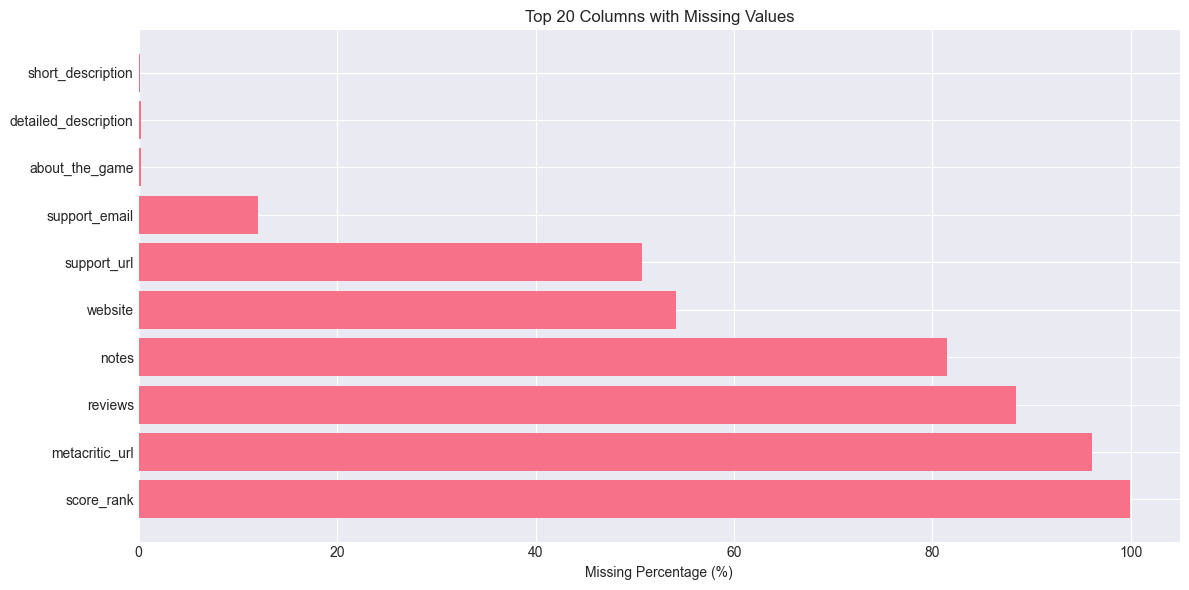

In [5]:
# Análisis de valores faltantes
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"\nColumns with missing values: {len(missing_df)} / {len(df.columns)}")
print(f"\nTop 20 columns with most missing data:\n")
display(missing_df.head(20))

# Visualización
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    top_missing = missing_df.head(20)
    plt.barh(top_missing['Column'], top_missing['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values')
    plt.tight_layout()
    plt.savefig('../reports/figures/01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
